In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [1]:
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(root='./data', train= True, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]

170500096it [00:06, 27858132.39it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

## LeNET

In [0]:
class LeNET(nn.Module):
    def __init__(self):
        super(LeNET,self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),  # 3 -> depth in that layer , 6 -> number of filter/kernels , 5 -> kernel size
            nn.ReLU(),
            nn.AvgPool2d(2, stride = 2),
            nn.Conv2d(6, 16, 5),  # 6 -> depth of that layer, 16-> number of filters,  5-> kernel size
            nn.ReLU(),
            nn.AvgPool2d(2, stride = 2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )

    def forward(self,x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x



In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([128, 3, 32, 32])
torch.Size([3, 32, 32])
0


In [0]:
net = LeNET()
out = net(images)

In [33]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNET()
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 39.44, Train acc: 39.41
Epoch: 1/16, Test acc: 43.15, Train acc: 43.48
Epoch: 2/16, Test acc: 46.43, Train acc: 46.57
Epoch: 3/16, Test acc: 48.48, Train acc: 49.15
Epoch: 4/16, Test acc: 49.47, Train acc: 50.10
Epoch: 5/16, Test acc: 49.91, Train acc: 51.23
Epoch: 6/16, Test acc: 52.34, Train acc: 53.51
Epoch: 7/16, Test acc: 52.76, Train acc: 53.96
Epoch: 8/16, Test acc: 52.52, Train acc: 54.63
Epoch: 9/16, Test acc: 51.18, Train acc: 53.69
Epoch: 10/16, Test acc: 54.51, Train acc: 56.75
Epoch: 11/16, Test acc: 54.38, Train acc: 57.17
Epoch: 12/16, Test acc: 54.39, Train acc: 57.69
Epoch: 13/16, Test acc: 54.36, Train acc: 57.34
Epoch: 14/16, Test acc: 55.57, Train acc: 59.36
Epoch: 15/16, Test acc: 53.83, Train acc: 57.54


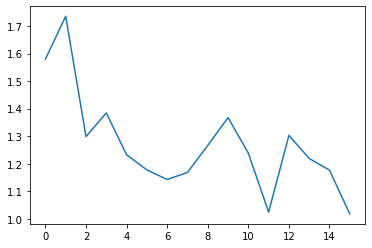

In [44]:

loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## GPU

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net1(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net1 = LeNET().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [58]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net1(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
    print('Epoch: %d/%d' % (epoch, max_epochs))    
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()
        
    

Epoch: 0/16
Epoch: 0/16, Test acc: 10.00, Train acc: 10.00
Epoch: 1/16
Epoch: 1/16, Test acc: 10.00, Train acc: 10.00
Epoch: 2/16
Epoch: 2/16, Test acc: 10.00, Train acc: 10.00
Epoch: 3/16
Epoch: 3/16, Test acc: 10.00, Train acc: 10.00
Epoch: 4/16


KeyboardInterrupt: ignored